![cropped-SummerWorkshop_Header.png](../../resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Allen Brain Observatory Visual Behavior Ophys </h1> 
<h2 align="center"> SWDB 2024 - Day 1 </h2> 
<h3 align="center"> Afternoon Session </h3> 

The Allen Brain Observatory Visual Behavior Ophys dataset used in vivo 2-photon calcium imaging (also called optical physiology, or “ophys”) to measure the activity of genetically identified neurons in the visual cortex of mice performing a go/no-go visual change detection task. This dataset can be used to evaluate the influence of experience, expectation, and task engagement on neural coding and dynamics in excitatory and inhibitory cell populations. 

***What kind of questions can you answer with this dataset?***

In this dataset, populations of excitatory or inhibitory neurons were tracked across multiple days of task performance under varying sensory and behavioral conditions, including active behavior and passive viewing, as well as familiar and novel stimuli. In a subset of recordings, multiple cortical areas and depths were simultaneously recorded. The dataset also contains the full training history of all mice as they learned the task across several learning stages. 

This makes the dataset appropriate for questions about coding for sensory, behavioral, and task features in specific cell populations, as well as analysis of changes in activity patterns over time.

- Do excitatory and inhibitory neuron types represent distinct features of stimulus, behavior, or task variables?
- How do coding properties change with novelty and familiarization?
- Do interactions across cortical areas or depths fluctuate as animal's engagement and motivation changes?
- Are there unique subnetworks or ensembles that represent particular types of information?
- Do network interactions reorganize as stimuli become familiar? Do they depend on task engagement?
- How does expectation alter neural representations? Are there surprise signals in the visual cortex?
- Can you predict behavioral choices from neural activity? Which cell populations are most predictive?
- How do animals learn the behavioral task? What strategies do they take?
- Does animal learning progression influence activity patterns in well trained mice? 

These are just some of the questions that might be addressed from this type of data.  


**Databook**

The databook is your one-stop-shop for understanding the various dimensions of this dataset, the methods used, and how to access the data that you are interested in. 

You can find the pages for the Visual Behavior Ophys dataset here: https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html 

![vbo_databook.png](../../resources/vbo_databook.png)

Using the Python objects we'll show you below, you can extract information about this dataset such as which genetically defined cell populations were imaged, which session types are available, and how to find the same neurons across multiple sessions. 

The available data for each session includes: 
- Calcium fluorescence traces and deconvolved events representing neural activity
- Running speed and pupil area as measures of arousal and behavioral state
- Stimulus presentation times, including times of image changes and image omissions
- Licking responses and reward times associated with task performance
- Average projection images of 2-photon movies to visualize spatial organization of recorded neurons

## Accessing the data cache

In [38]:
# We need to import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn makes pretty plots & sets font sizes nicely
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# confirm that you are currently using the newest version of SDK (2.16.2)
import allensdk
allensdk.__version__

'2.16.2'

The code below shows you how to use the `VisualBehaviorOphysProjectCache` class to load metadata tables & explore the features of the dataset.

In [40]:
# This is the directory where files will be saved
# If using Code Ocean, this should link to the data directory, where the files will already be available
# output_dir = r'/scratch/'
output_dir = r'/Users/marinag/Documents/Data/visual_behavior_ophys_cache_dir'

In [41]:
# import behavior projet cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


The cache contains methods that allow you to explore the types of recording sessions that exist in the dataset, and to load the data for individual experiments.

### Load all cache tables

In [42]:
# There are 4 metadata tables associated with the Visual Behavior Ophys dataset
behavior_session_table = cache.get_behavior_session_table()  
ophys_session_table = cache.get_ophys_session_table()   
ophys_experiment_table = cache.get_ophys_experiment_table()    
ophys_cells_table = cache.get_ophys_cells_table()                         


#print number of items in each table 
print('Number of behavior sessions = {}'.format(len(behavior_session_table)))
print('Number of ophys sessions = {}'.format(len(ophys_session_table)))
print('Number of ophys experiments = {}'.format(len(ophys_experiment_table)))
print('Number of unique cells = {}'.format(len(ophys_cells_table.cell_specimen_id.unique())))

Number of behavior sessions = 4782
Number of ophys sessions = 703
Number of ophys experiments = 1936
Number of unique cells = 50476


You can check the DataBook to learn more about the different tables, including what all of the columns mean:


https://allenswdb.github.io/physiology/ophys/visual-behavior/VBO-Dataset.html#vbo-metadata-tables


![vbo_metadata_tables.png](../../resources/vbo_metadata_tables.png)

## Plot behavior data for one session

For now we will grab one behavior session and load the data

In [81]:
# Grab a behavior_session_id
behavior_session_id = behavior_session_table[behavior_session_table.session_type=='OPHYS_3_images_A'].index.values[9]
print(behavior_session_id)

868064132


In [82]:
# Load the dataset for the behavior_session_id we selected 
behavior_session = cache.get_behavior_session(behavior_session_id)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


### Plot running speed and stimulus blocks

In [83]:
# Get the running_speed attribute of the behavior session
running_speed = behavior_session.running_speed.copy()
running_speed

,timestamps,speed
0,6.42775,0.122223
1,6.44442,5.685699
2,6.46101,11.025010
3,6.47772,15.904162
4,6.49450,20.115718
...,...,...
270126,4512.73578,14.224812
270127,4512.75246,13.181842
270128,4512.76914,12.043711
270129,4512.78582,10.826884


Text(0.5, 0, 'Time in session (seconds)')

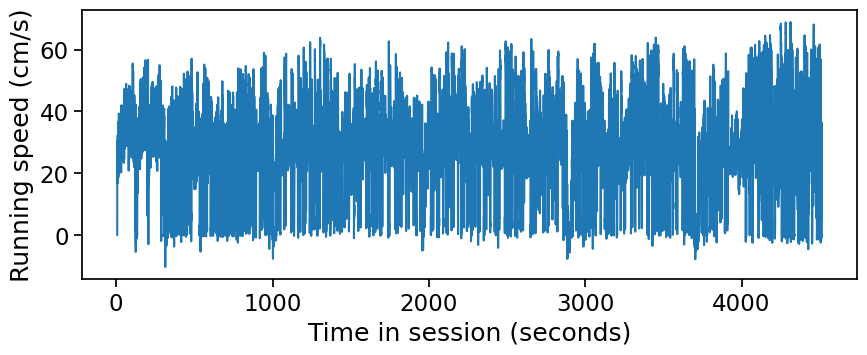

In [84]:
# Plot running alone
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(running_speed.timestamps, running_speed.speed)
ax.set_ylabel('Running speed (cm/s)')
ax.set_xlabel('Time in session (seconds)')

In [85]:
# Get stimulus_presentations table. What columns does it have?
stimulus_presentations = behavior_session.stimulus_presentations.copy()
stimulus_presentations.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,is_sham_change,stimulus_name,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,306.45948,0.00000,306.45948,0,17983,False,<NA>,<NA>,-99,0,-99,False,spontaneous,False
1,1,change_detection_behavior,0,im065,-99,0.25018,306.45948,306.70966,17983,17998,False,False,False,-99,1,0,False,Natural_Images_Lum_Matched_set_training_2017,True
2,1,change_detection_behavior,0,im065,-99,0.25023,307.21007,307.46030,18028,18043,False,False,False,-99,2,0,False,Natural_Images_Lum_Matched_set_training_2017,True
3,1,change_detection_behavior,0,im065,-99,0.25002,307.96084,308.21086,18073,18088,False,False,False,-99,3,0,False,Natural_Images_Lum_Matched_set_training_2017,True
4,1,change_detection_behavior,0,im065,-99,0.25017,308.71132,308.96149,18118,18133,False,False,False,-99,4,0,False,Natural_Images_Lum_Matched_set_training_2017,True


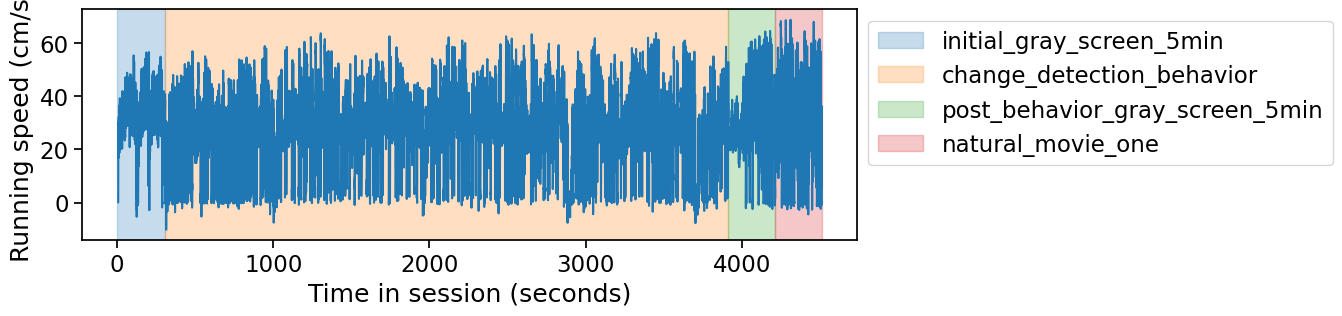

In [86]:
# Plot running speed with stimulus blocks in different colors

# Running speed
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(running_speed.timestamps, running_speed.speed)
ax.set_ylabel('Running speed (cm/s)')
ax.set_xlabel('Time in session (seconds)')

# Iterate through stimulus blocks and show them in color
# Set colormap
colors = sns.color_palette()
# Loop through unique stimulus blocks
for i, stimulus_block_name in enumerate(stimulus_presentations.stimulus_block_name.unique()): 
    # Get stimulus metadata for this stimulus block
    stimulus_block_data = stimulus_presentations[stimulus_presentations.stimulus_block_name==stimulus_block_name]
    # Plot the duration of the stimulus block in color using matplotlib's axvspan
    ax.axvspan(xmin=stimulus_block_data.start_time.values[0], xmax=stimulus_block_data.end_time.values[-1], 
               color=colors[i], alpha=0.25, label=stimulus_block_name)
# Add legend to label stimulus blocks
ax.legend(bbox_to_anchor=(1,1))

Theres a lot going on there, let's zoom in on just a few seconds of data

### Plot running speed and task events around the time of an image change

Let's get the time of one image change during the `change_detection_behavior block` of the `stimulus_presentations` table and plot the stimulus, `running_speed` and behavior events (`licks` and `rewards`) in a +/- 10 second window around the change time


First lets define some functions to plot running, licks, and rewards, and stimuli

In [102]:
def plot_running_speed_in_window(running_speed, window_start, window_end, ax): 
    '''
    A function to plot running speed in specific window of time on the provided axis
    
    running_speed: A table including columns for `running_speed` and `timestamps`
    '''
    # Plot the running speed, in seconds, on the provided axis
    ax.plot(running_speed.timestamps, running_speed.speed)
    ax.set_ylabel('Running speed (cm/s)')
    ax.set_xlabel('Time in session (seconds)')
    # Limit to the selected window
    ax.set_xlim(window_start, window_end)

    # Return axes so we can add other things to it 
    return ax


def plot_licks_in_window(licks, window_start, window_end, ax): 
    '''
    A function to plot licks occuring in specific window of time on the provided axis
    
    licks: A table with timestamps of each lick in the session
    '''
    # Get licks in the provided window
    window_licks = licks[(licks.timestamps>=window_start) & (licks.timestamps<=window_end)]
    # Iterate through them and plot as a line
    for idx, lick in window_licks.iterrows():
        ax.plot(lick.timestamps, -5, '|', color='gray')

    # Return axes so we can add other things to it 
    return ax


def plot_rewards_in_window(rewards, window_start, window_end, ax): 
    '''
    A function to plot rewards occuring in specific window of time on the provided axis
    
    rewards: A table with timestamps of each reward in the session
    '''
    # Get rewards in the provided window
    window_rewards = rewards[(rewards.timestamps>=window_start) & (rewards.timestamps<=window_end)]
    # Iterate through them and plot as a line
    for idx, reward in window_rewards.iterrows():
        ax.plot(reward.timestamps, -10, 'o', color='cyan')

    # Return axes so we can add other things to it 
    return ax


def plot_stimuli_in_window(stimulus_presentations, window_start, window_end, ax): 
    '''
    A function to plot a colored bar for each unique image_name in a specific window of time
    within the provided stimulus_presentations table, on the provided axis. 
    
    stimulus_presentations: Table of all stimulus presentations and associated metadata
                            Function will limit to the `change_detection_behavior` block when image presentations occur
    '''

    # Make sure we are only looking at stimuli during the change detection block (other stimulus blocks do not have unique image names)
    stimulus_presentations = stimulus_presentations[(stimulus_presentations.stimulus_block_name=='change_detection_behavior')]

    # create colormap for unique image names
    colors = sns.color_palette('hls', len(stimulus_presentations.image_name.unique()))
    image_colors_dict = {}
    for i, image_name in enumerate(np.sort(stimulus_presentations.image_name.unique())): 
        # omissions are white
        if image_name == 'omitted': 
            image_colors_dict[image_name] = [1, 1, 1]
        # images are in color
        else: 
            image_colors_dict[image_name] = colors[i]

    # Get all stimuli in the provided window
    window_stimuli = stimulus_presentations[(stimulus_presentations.start_time>=window_start) & 
                                          (stimulus_presentations.end_time<=window_end)]

    # Create figure axes if not already provided
    if ax is None: 
        fig, ax = plt.subplots(figsize=(10,3))

    # Loop through stimuli and plot them
    for idx, stimulus in window_stimuli.iterrows():
        image_name = stimulus['image_name']
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=image_colors_dict[image_name], alpha=0.25)

    # Return axes so we can add other things to it   
    return ax




Now let's get the stimulus presentations in a short window around one of the changes and provide the data to our plotting fuctions

In [110]:
# Get change detection behavior block from stimulus presentations table
stimulus_block_name = 'change_detection_behavior'
change_detection_stimuli = stimulus_presentations[(stimulus_presentations.stimulus_block_name==stimulus_block_name)]

# Get stimulus presentations corresponding to image changes
image_changes = change_detection_stimuli[(change_detection_stimuli.is_change==True)]

#  Pick one image change start time
image_change_time = image_changes.start_time.values[11]

# Get a defined window of time around the image change
window_start = image_change_time-10
window_end = image_change_time+15

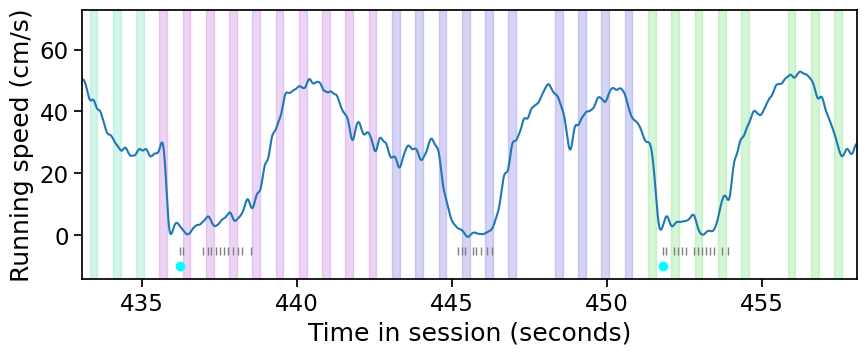

In [111]:
# Plot stimulus and behavior together in this window using our functions

fig, ax = plt.subplots(figsize=(10, 3.5))

# Plot stimuli using function we created, for the subset of stimuli we selected
ax = plot_stimuli_in_window(change_detection_stimuli, window_start, window_end, ax)

# Plot running speed in the window we selected
ax = plot_running_speed_in_window(behavior_session.running_speed, window_start, window_end, ax)

# Plot licks in the window we selected
ax = plot_licks_in_window(behavior_session.licks, window_start, window_end, ax)

# Plot rewards in the window we selected
ax = plot_rewards_in_window(behavior_session.rewards, window_start, window_end, ax)


There are a lot of interesting features in this snippet of behavior: 
* The first image change (light blue to pink) is a hit trial, because the mouse licked within the 750ms reward window
* The second image change (pink to purple) is a miss, because the mouse did not respond fast enough
* There is a false alarm lick a few image repetitions after the second image change
* There is a stimulus omission, during which the mouse does not lick or stop
* However there is a slight change in running speed after the omission - maybe the mouse thought it was a change?
* The third image change (purple to green) was a hit trial
* The mouse appears to have slowed down a little prior to the third image change, and as a result, may have had a faster reaction time. Is the mouse trying to anticipate when the changes might occur??

## Evaluating task performance

In the snippet of behavioral data above, we saw some cases where the mouse correctly responded to a change and others when it did not. 

How can we evaluate the mouse's overall performance? 

There are a few additional data structures that can help with this. 

### How many hit and miss trials are there? 

We can use the `trials` table to quantify the number of hits and misses

In [113]:
trials = behavior_session.trials.copy()
trials.head()

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time,go,catch,lick_times,response_time,...,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
trials_id,,,,,,,,,,,,,,,,,,,,,
0,306.43833,316.71339,im065,im063,True,312.46433,False,False,[],NaN,...,312.59325,0.005,False,False,False,False,False,True,18343,10.27506
1,316.94689,324.97007,im063,im062,True,320.72119,False,False,"[321.30041, 321.70072, 321.96762, 322.10109, 3...",321.30041,...,320.85003,0.005,False,False,False,False,False,True,18838,8.02318
2,325.20360,332.45951,im062,im063,True,328.22719,False,False,"[329.80735, 330.10759, 330.40784, 330.54128, 3...",329.80735,...,328.37284,0.005,False,False,False,False,False,True,19288,7.25591
3,332.70974,336.92985,im063,im063,False,NaN,False,False,[336.6129],NaN,...,NaN,0.000,False,False,False,False,True,False,-99,4.22011
4,337.21341,343.08487,im063,im063,False,NaN,False,False,"[342.26753, 342.45099, 342.60126, 342.76792]",NaN,...,NaN,0.000,False,False,False,False,True,False,-99,5.87146


In [117]:
# Print out the number of hits and misses
print('out of', len(trials[trials.go]), 'go trials (i.e. image changes)' )
print(len(trials[trials.hit]), 'were hits')
print('and', len(trials[trials.miss]), 'were misses')

out of 304 go trials (i.e. image changes)
90 were hits
and 214 were misses


To learn more about the task's trial structure, how catch trials are defined, and how false alarm rates can be computed, you can check the DataBook: https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-BehaviorSessionData.html 

#### Pre-computed metrics of task performance

What about other metrics of performance? 

In [120]:
# Conveniently, there is also a table provided with summary metrics of performance
behavior_session.get_performance_metrics()

{'trial_count': 493,
 'go_trial_count': 304,
 'catch_trial_count': 44,
 'hit_trial_count': 90,
 'miss_trial_count': 214,
 'false_alarm_trial_count': 3,
 'correct_reject_trial_count': 41,
 'auto_reward_count': 5,
 'earned_reward_count': 90,
 'total_reward_count': 95,
 'total_reward_volume': 0.6550000000000001,
 'maximum_reward_rate': 2.812953368968765,
 'engaged_trial_count': 157,
 'mean_hit_rate': 0.32438025672238174,
 'mean_hit_rate_uncorrected': 0.32581703833157716,
 'mean_hit_rate_engaged': 0.4382110957860928,
 'mean_false_alarm_rate': 0.09845317672523556,
 'mean_false_alarm_rate_uncorrected': 0.07112736528177706,
 'mean_false_alarm_rate_engaged': 0.10495267311305047,
 'mean_dprime': 0.8489840256888634,
 'mean_dprime_engaged': 1.1353746489943493,
 'max_dprime': 1.5499876268702335,
 'max_dprime_engaged': 1.5499876268702335}

You can check the DataBook to see how these metrics were defined: ***insert link***

In [132]:
# Some of these metrics are also provided in the `behavior_session_table` so that you can filter sessions based on task performance

behavior_session_table.loc[behavior_session_id]

ophys_session_id                                                                <NA>
ophys_container_id                                                               NaN
mouse_id                                                                      448900
indicator                                                                    GCaMP6s
full_genotype                      Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...
driver_line                                          [Slc17a7-IRES2-Cre, Camk2a-tTA]
cre_line                                                           Slc17a7-IRES2-Cre
reporter_line                                                     Ai94(TITL-GCaMP6s)
sex                                                                                M
age_in_days                                                                      120
imaging_plane_group_count                                                       <NA>
project_code                                                     

Hmm this mouse wasn't doing great... Was it missing changes consistently the whole session? Or do they all occur at a specific time? 

It looks like there were only 157 engaged trials, out of 304 total go trials. Maybe the mouse disengaged at some point in the session and started missing lots of changes. 

In [133]:
# There is another table that provides continous measures of behavior performance across the session
rolling_performance_df = behavior_session.get_rolling_performance_df()
rolling_performance_df.columns

Index(['reward_rate', 'hit_rate_raw', 'hit_rate', 'false_alarm_rate_raw',
       'false_alarm_rate', 'rolling_dprime'],
      dtype='object')

(0.0, 3.0)

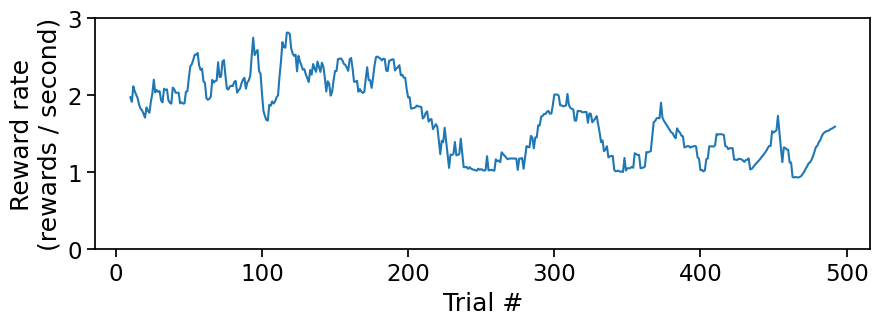

In [134]:
# Lets plot the reward rate over trials. This can be used as a metric of task engagement. 
fig, ax = plt.subplots(figsize=(10,3))

ax.plot(rolling_performance_df.index, rolling_performance_df.reward_rate)
ax.set_ylabel('Reward rate\n(rewards / second)')
ax.set_xlabel('Trial #')
ax.set_ylim(0, 3)


## Plot neural activity for one imaging plane during a session 

Above we looked at a behavior session using the `behavior_session_table`. Sometimes behavior sessions also have ophys, but other times they dont, for sessions where the mouse was still learning the task, or ophys sessions where the QC criteria were not met (but the behavior data is still provided). 

To get ophys sessions you can use the `ophys_session_table`. If you have read the Visual Behavior Ophys page of the DataBook you will know that each ophys session could contain multiple imaging planes, and the ophys data is provided on a plane by plane basis. 

To identify individual imaging planes within a given ophys session, you use the `ophys_experiment_table`. 

In [52]:
ophys_experiment_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [127]:
# Get an experiment - the first one in the table
ophys_experiment_id = ophys_experiment_table.index.values[0]
print(ophys_experiment_id)

951980471


In [54]:
# Load the data using the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [55]:
# Check metadata to see what conditions this experiment was performed under
ophys_experiment.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 206,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 9, 20, 9, 59, 38, 837000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('592420fb-911d-41c5-8763-4ebdeb0ef416'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 951520319,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028342,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 951980471,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 951410079,
 'targeted_structure': 'VISp'}

What do the cells look like? 

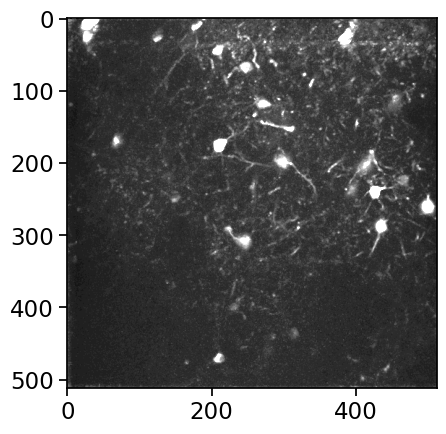

In [56]:
# Plot the maximum intensity projection
plt.imshow(ophys_experiment.max_projection, cmap='gray', vmin=0, vmax=np.percentile(ophys_experiment.max_projection, 99))

#### Get the cell activity traces and plot dF/F and events for one cell

In [57]:
# Get normalized fluorescence traces
dff_traces = ophys_experiment.dff_traces.copy()
dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1086613265,1080743723,"[0.9365729093551636, 0.5824856162071228, 1.296..."
1086613823,1080743752,"[0.555761456489563, 0.7478731870651245, 0.4397..."
1086619526,1080743754,"[0.2593991160392761, 0.30149346590042114, 0.34..."
1086614149,1080743763,"[0.4112476706504822, 0.1977161169052124, 0.143..."
1086614351,1080743765,"[0.08977238088846207, 0.0746675506234169, 0.26..."


In [58]:
# Get deconvolved events
events = ophys_experiment.events.copy()
events.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086613265,1080743723,"[0.0, 0.0, 0.5568727052177824, 0.0, 0.46726365...","[0.0, 0.0, 0.40076209492295517, 0.148502141158...",0.0484,0.068267
1086613823,1080743752,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1441,0.118111
1086619526,1080743754,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0966,0.097046
1086614149,1080743763,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0771,0.086072
1086614351,1080743765,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0801,0.088142


In [59]:
# Get ophys timestamps
ophys_timestamps = ophys_experiment.ophys_timestamps.copy()
ophys_timestamps

array([   9.26356,    9.35677,    9.44998, ..., 4513.62526, 4513.71849,
       4513.81173])

Text(0, 0.5, 'dF/F')

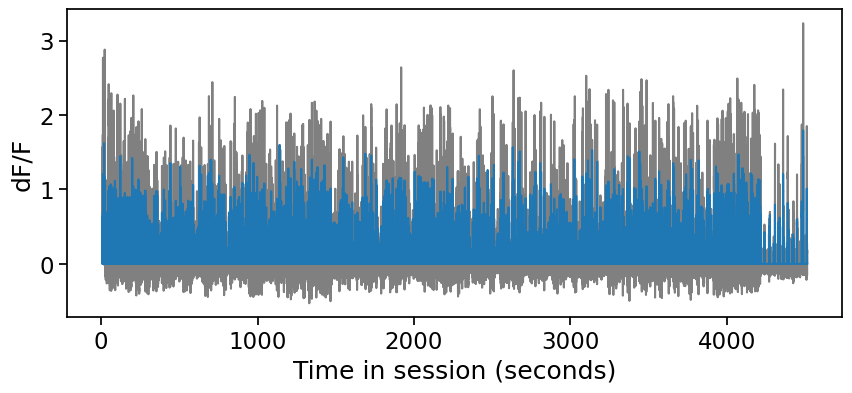

In [60]:
# Plot dF/F and events for one cell
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ophys_timestamps, dff_traces.iloc[0]['dff'], color='gray', label='dF/F')
ax.plot(ophys_timestamps, events.iloc[0]['events'], color=sns.color_palette()[0], label=events)
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('dF/F')


### Plot events for all cells

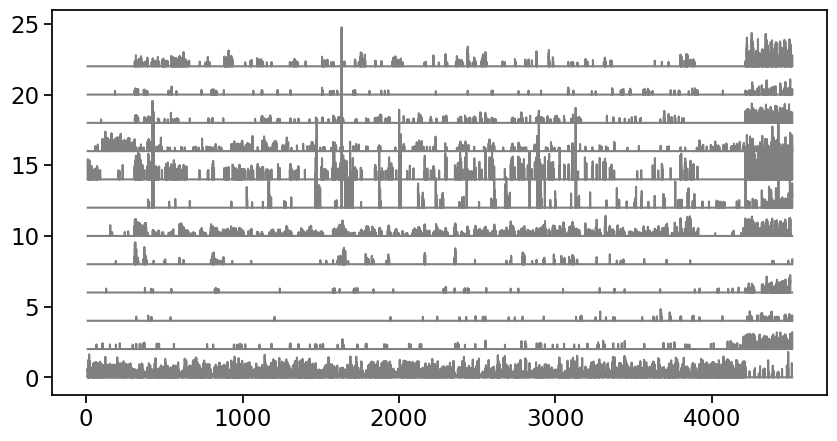

In [65]:
# Plot events for all cells
fig, ax = plt.subplots(figsize=(10, 5))
for i, cell_specimen_id in enumerate(events.index.values): 
    ax.plot(ophys_timestamps, events.loc[cell_specimen_id]['events']+(i*2), color='gray')    

Why are some cells so active at the end?

Get the `stimulus_presentations` table for this experiment and plot the stimulus blocks along with the traces, like we did before for running speed

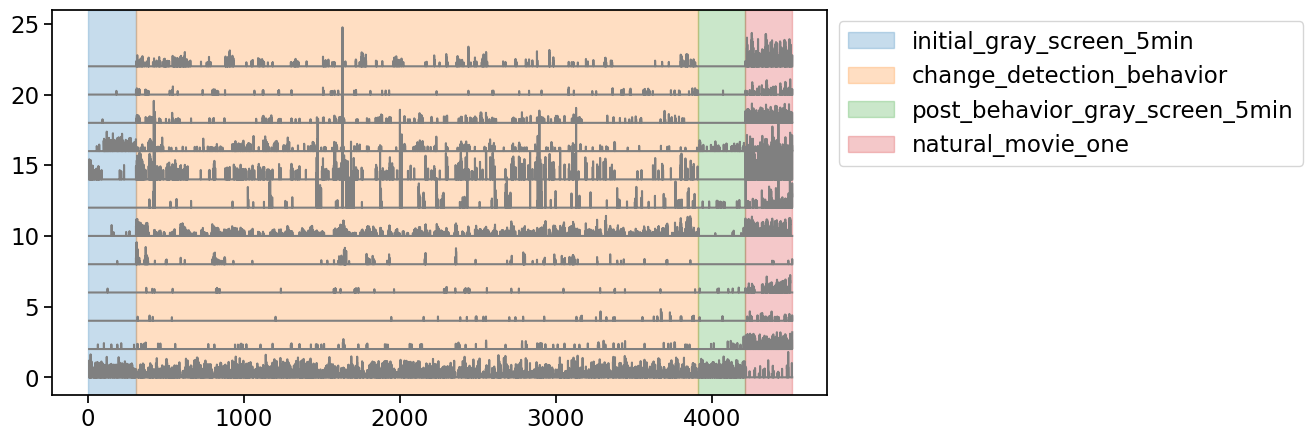

In [66]:
# Plot events for all cells
fig, ax = plt.subplots(figsize=(10, 5))
for i, cell_specimen_id in enumerate(events.index.values): 
    ax.plot(ophys_timestamps, events.loc[cell_specimen_id]['events']+(i*2), color='gray')    

# Iterate through stimulus blocks and show them in color
colors = sns.color_palette()
for i, stimulus_block_name in enumerate(stimulus_presentations.stimulus_block_name.unique()): 
    stimulus_block_data = stimulus_presentations[stimulus_presentations.stimulus_block_name==stimulus_block_name]
    ax.axvspan(xmin=stimulus_block_data.start_time.values[0], xmax=stimulus_block_data.end_time.values[-1], 
               color=colors[i], alpha=0.25, label=stimulus_block_name)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('Event magnitude (a.u.)')

Looks like there are a whole variety of response patterns. Some cells respond during the change detection behavior block, while others respond most during the natural movie stimulus. Some cells are active during the gray screen period, and others arent. 

Look at the very last cell at the bottom of the plot - that cell appears to be suppressed by the natural movie stimulus compared to during the task or gray screen periods. 

#### Let's zoom in on one cell's activity and look at the dynamics

Text(0, 0.5, 'dF/F')

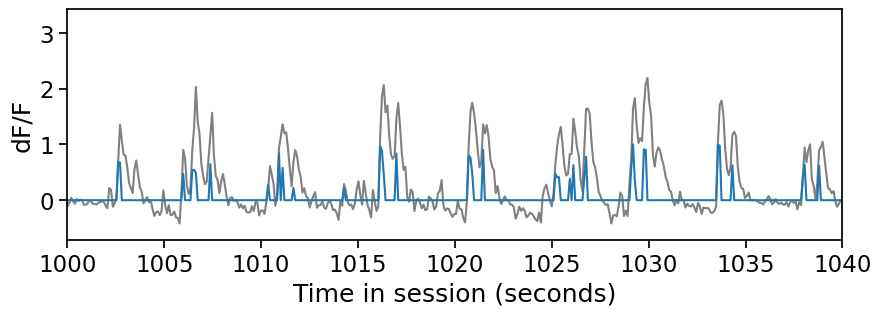

In [129]:
# Let's plot the first cell (index 0), and limit the plot to a 40 second window during the session
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(ophys_timestamps, dff_traces.iloc[0]['dff'], color='gray', label='dF/F')
ax.plot(ophys_timestamps, events.iloc[0]['events'], color=sns.color_palette()[0], label=events)
ax.set_xlim(1000, 1040)
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('dF/F')

What is causing this cell to be active in such a regular pattern? Is it the stimulus? What else could be happening that could cause this pattern of cell activation? What could this cell encode?

## What else is available as part of this dataset? 

There are many more dimensions to this dataset than we were able to explore here. Combined with the DataBook, the exercises below will help you learn how to discover what else is available for your analysis. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h4> Homework / Futher exploration</h4>
<p>

Use the DataBook as a reference to learn how to access and interpret different features of the dataset.
<p>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

### Exploring metadata tables for sessions and cells of interest 

You can learn about the various conditions and session types available in the dataset here: 

https://allenswdb.github.io/physiology/ophys/visual-behavior/VBO-Dataset.html

<p>

**Cell types, imaging depths, and targeted structures**
1. What are the unique values of `full_genotype` in the behavior or ophys session tables? What is a `cre_line`?
2. What are the unique values of `imaging_depth` and `targeted_structure`? Does each ophys session have just one of each, or can there be more than one? 
3. What are the unique values of `project_code`? Explore the DataBook to figure out what these mean.
4. For a session with `project_code` = `VisualBehaviorMultiscope` session, what are the imaging depths and targeted structures that were recorded? What about other project codes?
<p>

**Tracking the same neurons across sessions**
1. What does the `ophys_cells_table` contain? Can you link the information in this table with the `ophys_experiment_table`?
2. Find a `cell_specimen_id` in the `ophys_cells_table`. How many unique `ophys_experiment_id`s is it associated with? 
3. What are the unique values of `session_type` in the metadata tables? Are they different in the `behavior_session_table` and `ophys_session_table`?
4. What is the `prior_exposures_to_image_set` column of the metadata tables? What is the `experience_level` column? How about the `image_set` column? How do they relate to each other?
5. What are the unique values of the `passive` column of the metadata tables? What `session_types` exist for passive vs. active? 
<p>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>

### Exploring neural activity and relationships to stimulus and behavior

You can learn about how to load, visualize, and analyze data for individual behavior sessions or ophys experiments here: 

https://allenswdb.github.io/physiology/ophys/visual-behavior/VBO-ExperimentData.html 

https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-BehaviorSessionData.html


**Neural activity & transgenic lines**
1. What do the max intensity projections look like for different genotypes? 
2. How many cells are there in experiments from different genotypes? 
3. What do single cell and population activity look like for different genotypes?
<p>

**Stimulus & behavior**
1. What are all the unique columns of the `stimulus_presentations` table? 
2. How does pupil diameter change across a session or right after an image change? 
3. Investigate relationship of running speed and pupil diameter for image changes and image omissions
4. Do mice lick after omissions? 
<p>

**Changes in activity with novelty and behavioral context**
1. Plot neural activity across stimulus blocks or trial types for familiar vs novel for the same cells
2. Plot running & pupil across stimulus blocks or trial types for active & passive sessions for the same mouse
<p>



A little preview of what you can find in the DataBook... 

## Longitudinal imaging across sensory and behavioral contexts

A key feature of the Visual Behavior Ophys dataset is that populations of neurons were tracked across multiple days of imaging under varying sensory and behavioral conditions. 

So far we only looked at activity for one type of session, but there are many types of sessions and many exciting analyses can be done to understand how neural coding and dynamics change over time, such as with novelty and familiarization, or with behavioral state. 

These different session types, and how to access the data for them, is described in the databook: 

https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html#experimental-design 


![vbo_expt_design.png](../../resources/vbo_expt_design.png)



In addition, a subset of the dataset includes simultaneous recordings across multiple cortical areas and depths, allowing analysis of interactions and information flow. 

Yet again, you can find more information about the structure of the data in the DataBook! 

https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html#data-structure


![data_structure.png](../../resources/data_structure.png)